**Efecto de los outliers en las metricas de regresion**

https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828


**MAE, MSE, RMSE**

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
np.random.seed(1514)

**Funciones**

In [21]:
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
        mae += abs(i-ref)
        c += 1
    return mae / c

In [22]:
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
        mse += (i-ref)**2
        c += 1
    return mse / c

In [23]:
def rmse(data, ref):
    return (mse(data, ref))**(1/2)

**Parametros**

In [24]:
num_sets = 1000
num_points = 1000

In [25]:
# Generamos x conjuntos con y puntos de datos cada uno
data = np.random.normal(100, 20, (num_sets, num_points))

**Evaluacion de la metrica**

In [26]:
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Muestra aleatoria "num_ouliers" para cada conjunto
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Listas para mantener la metrica para todos los conjuntos originales
    mae_original = []
    mse_original = []
    rmse_original = []
    
    # Listas para mantener la metrica para todos los conjuntos ruidosos
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # Para cada conjunto de observacion, evaluar las 3 distancias a la media del conjunto 
    for i in range(data.shape[0]):
        
        # Recupera las observaciones
        observations = data[i]
        
        # Crea una version ruidosa de la data con randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calcula el valor medio del conjunto
        # Es importante usar la media del conjunto original en ambos casos,
        # para prevenir el shifting y la alteracion del resultado.
        set_mean = np.mean(observations)
        
        # Evalua las metricas
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))
        rmse_original.append(rmse(observations, set_mean))
        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))
        rmse_noisy.append(rmse(observations_noisy, set_mean))
        
    # Plots todo
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    kde = True
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = kde, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = kde)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = kde, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = kde)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = kde, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = kde)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax2.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()
    
    # Calcula la distancia de las medias de las distribuciones
    dif_mean_mae = np.mean(mae_noisy) - np.mean(mae_original)
    dif_mean_mse = np.mean(mse_noisy) - np.mean(mse_original)
    dif_mean_rmse = np.mean(rmse_noisy) - np.mean(rmse_original)
    print("The distance between the means of the MAE distributions is: {:.2f} ({:.2f}%)".format(dif_mean_mae, 100 * dif_mean_mae / np.mean(mae_original)))
    print("The distance between the means of the MSE distributions is: {:.2f} ({:.2f}%)".format(dif_mean_mse, 100 * dif_mean_mse / np.mean(mse_original)))
    print("The distance between the means of the RMSE distributions is: {:.2f} ({:.2f}%)".format(dif_mean_rmse, 100 * dif_mean_rmse / np.mean(rmse_original)))

**Comparativa**

The distance between the means of the MAE distributions is: 0.00 (0.00%)
The distance between the means of the MSE distributions is: 0.00 (0.00%)
The distance between the means of the RMSE distributions is: 0.00 (0.00%)


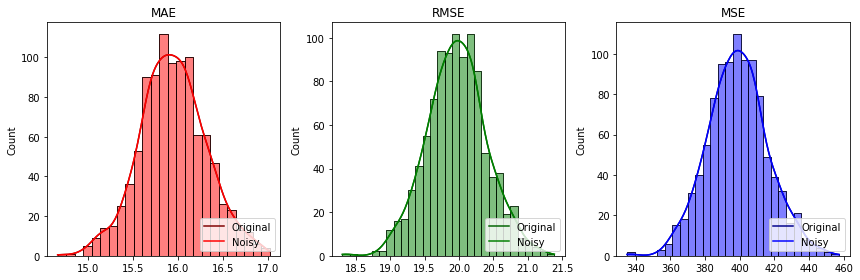

In [27]:
evaluate_metrics(data, num_outliers = 0, amplitude_outliers = 1)

The distance between the means of the MAE distributions is: 0.17 (1.06%)
The distance between the means of the MSE distributions is: 22.66 (5.68%)
The distance between the means of the RMSE distributions is: 0.56 (2.79%)


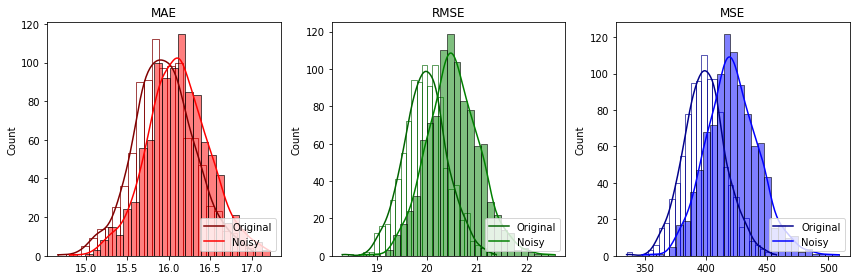

In [28]:
evaluate_metrics(data, num_outliers = 2, amplitude_outliers = 2)

The distance between the means of the MAE distributions is: 1.76 (11.04%)
The distance between the means of the MSE distributions is: 1691.94 (424.11%)
The distance between the means of the RMSE distributions is: 25.38 (127.09%)


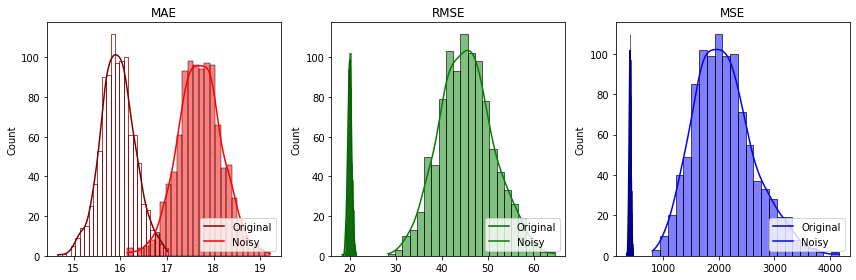

In [29]:
evaluate_metrics(data, num_outliers = 2, amplitude_outliers = 10)

The distance between the means of the MAE distributions is: 0.84 (5.26%)
The distance between the means of the MSE distributions is: 112.29 (28.15%)
The distance between the means of the RMSE distributions is: 2.63 (13.17%)


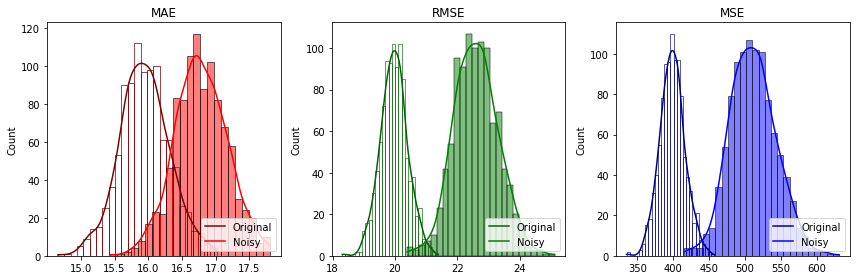

In [30]:
evaluate_metrics(data, num_outliers = 10, amplitude_outliers = 2)

The distance between the means of the MAE distributions is: 8.75 (54.89%)
The distance between the means of the MSE distributions is: 8378.82 (2100.29%)
The distance between the means of the RMSE distributions is: 73.51 (368.14%)


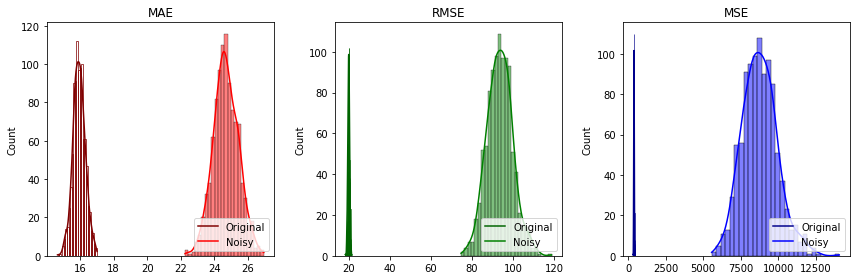

In [31]:
evaluate_metrics(data, num_outliers = 10, amplitude_outliers = 10)

The distance between the means of the MAE distributions is: 8.00 (50.17%)
The distance between the means of the MSE distributions is: 1062.55 (266.35%)
The distance between the means of the RMSE distributions is: 18.25 (91.37%)


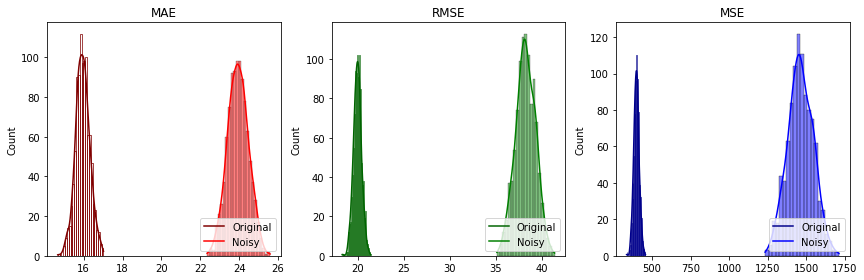

In [32]:
evaluate_metrics(data, num_outliers = 100, amplitude_outliers = 2)

The distance between the means of the MAE distributions is: 19.95 (125.12%)
The distance between the means of the MSE distributions is: 208390.01 (52236.53%)
The distance between the means of the RMSE distributions is: 432.46 (2165.69%)


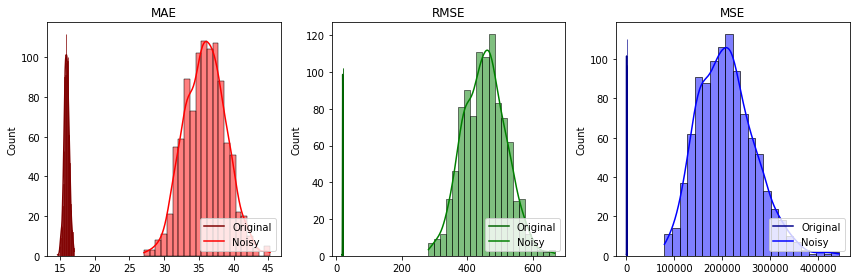

In [33]:
evaluate_metrics(data, num_outliers = 2, amplitude_outliers = 100)

In [34]:
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Sample random "num_ouliers" points for each set
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Lists to keep the metrics for all original sets
    mae_original = []
    mse_original = []
    rmse_original = []
    # Lists to keep the metrics for all noisy sets
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # For each observation set, evaluates all three distances to the mean of the set
    for i in range(data.shape[0]):
        # Recovers the observations
        observations = data[i]
        # Create a noisy verion of the data with the randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases, to prevent it from shifting and altering the result.
        set_mean = np.mean(observations)
        
        # Evaluate the metrics
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))
        rmse_original.append(rmse(observations, set_mean))
        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))
        rmse_noisy.append(rmse(observations_noisy, set_mean))
        
    # Plots all
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = True, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = True)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = True, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = True)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = True, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = True)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax2.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()

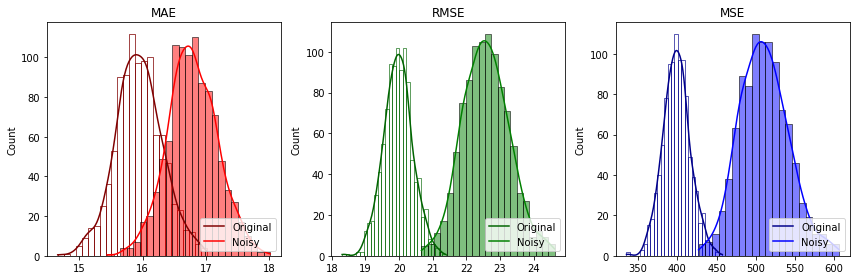

In [35]:
evaluate_metrics(data, num_outliers = 10, amplitude_outliers = 2)